In [264]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
from nltk.corpus import wordnet
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [2]:
pd.get_option('max_colwidth')

50

In [3]:
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 10000)

In [4]:
data = pd.read_excel('BankReviews.xlsx')

In [5]:
data.head(5)

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!",Wyndham Capital Mortgage
1,2017-02-10,5,"Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!",Wyndham Capital Mortgage
2,2017-08-21,5,"We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind",Wyndham Capital Mortgage
3,2017-12-17,5,"We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindRead Less",Wyndham Capital Mortgage
4,2016-05-27,5,"I can't express how grateful I am for the support that Zach provided to me and my family during this home purchase! His customer service, responsiveness and professional demeanor is second to none. He was very thorough and took the time to educate me about the process along the way. I highly recommend working with Zach and Wyndham Capital!",Wyndham Capital Mortgage


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [7]:
data.isna().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

In [8]:
data['Stars'].value_counts()

5    410
1     95
Name: Stars, dtype: int64

### Sentiment analysis

In [9]:
X = data['Reviews']
Y = data['Stars']

In [10]:
def sentiment_result(text):
    text1=TextBlob(text)
    polarity=text1.sentiment.polarity
    if(polarity>0):
        return 'POSITIVE'
    elif(polarity<0):
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'
    

In [12]:
sentiment_dict=[]
for text in X:
    dictionary_sent={}
    dictionary_sent['reviews']=text
    dictionary_sent['sentiment']=sentiment_result(text)
    sentiment_dict.append(dictionary_sent)

In [15]:
data_sentiment=pd.DataFrame(sentiment_dict)

In [16]:
data_sentiment.head(5)

,reviews,sentiment
0,"Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!",POSITIVE
1,"Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!",POSITIVE
2,"We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind",NEGATIVE
3,"We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindRead Less",POSITIVE
4,"I can't express how grateful I am for the support that Zach provided to me and my family during this home purchase! His customer service, responsiveness and professional demeanor is second to none. He was very thorough and took the time to educate me about the process along the way. I highly recommend working with Zach and Wyndham Capital!",POSITIVE


In [18]:
data_sentiment.sentiment.value_counts()

POSITIVE    466
NEGATIVE     35
NEUTRAL       4
Name: sentiment, dtype: int64

### Frequently used Positive/Negative words

In [21]:
def clean_text(text):
    text=text.lower()
    text=text.strip()
    text="".join([ch for ch in text if ch not in string.punctuation])
    return text

In [26]:
X_new=X.apply(lambda x:clean_text(x))

In [28]:
X_new.head(5)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              great job wyndham capital each person was professional and helped us move through our refinance process smoothly thank you
1                                                                                                                                                                                                                                                                                                                                                                                                             

In [29]:
vect = CountVectorizer(stop_words='english')

In [72]:
vect.vocabulary_.items()

dict_items([('great', 1022), ('job', 1244), ('wyndham', 2495), ('capital', 365), ('person', 1649), ('professional', 1739), ('helped', 1081), ('refinance', 1857), ('process', 1727), ('smoothly', 2092), ('thank', 2254), ('matthew', 1423), ('richardson', 1945), ('helpful', 1082), ('correct', 557), ('product', 1736), ('mortgage', 1487), ('excellent', 820), ('service', 2037), ('past', 1619), ('experience', 833), ('question', 1782), ('use', 2388), ('needed', 1512), ('went', 2449), ('extra', 856), ('mile', 1454), ('right', 1950), ('wrong', 2494), ('encountered', 773), ('servicer', 2038), ('dealing', 614), ('previous', 1715), ('loan', 1358), ('pulled', 1765), ('viable', 2411), ('option', 1572), ('ultimately', 2345), ('saved', 1987), ('money', 1477), ('highly', 1095), ('recommend', 1834), ('brad', 308), ('thomka', 2268), ('team', 2233), ('needs', 1514), ('sincerest', 2073), ('thanks', 2257), ('ed', 748), ('lind', 1340), ('beginning', 270), ('started', 2140), ('stressful', 2174), ('time', 2280),

In [70]:
vect.get_feature_names()

['10',
 '100',
 '101',
 '1014',
 '1031',
 '1040s',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '2005',
 '2011',
 '2017',
 '2018',
 '20k',
 '212',
 '22',
 '23',
 '2300',
 '23rd',
 '25',
 '2500',
 '27',
 '29',
 '2929',
 '2d',
 '2nd',
 '30',
 '30days',
 '30k',
 '32',
 '34',
 '35',
 '375',
 '3days',
 '3rd',
 '40',
 '401k',
 '45',
 '450',
 '4506t',
 '46',
 '4875',
 '525',
 '54510',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '625',
 '770',
 '89',
 '8th',
 '995',
 'aaron',
 'aarons',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquire',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addedconsolidationit',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'a

In [34]:
token_count_vect = vect.fit_transform(X_new)

In [38]:
token_count_vect.toarray().shape

(505, 2507)

In [60]:
token_count_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
X_new.shape

(505,)

In [48]:
print(token_count_vect[0])

  (0, 1022)	1
  (0, 1244)	1
  (0, 2495)	1
  (0, 365)	1
  (0, 1649)	1
  (0, 1739)	1
  (0, 1081)	1
  (0, 1857)	1
  (0, 1727)	1
  (0, 2092)	1
  (0, 2254)	1


In [66]:
sum_words=token_count_vect.sum(axis=0)

In [77]:
vect.vocabulary_.items()

dict_items([('great', 1022), ('job', 1244), ('wyndham', 2495), ('capital', 365), ('person', 1649), ('professional', 1739), ('helped', 1081), ('refinance', 1857), ('process', 1727), ('smoothly', 2092), ('thank', 2254), ('matthew', 1423), ('richardson', 1945), ('helpful', 1082), ('correct', 557), ('product', 1736), ('mortgage', 1487), ('excellent', 820), ('service', 2037), ('past', 1619), ('experience', 833), ('question', 1782), ('use', 2388), ('needed', 1512), ('went', 2449), ('extra', 856), ('mile', 1454), ('right', 1950), ('wrong', 2494), ('encountered', 773), ('servicer', 2038), ('dealing', 614), ('previous', 1715), ('loan', 1358), ('pulled', 1765), ('viable', 2411), ('option', 1572), ('ultimately', 2345), ('saved', 1987), ('money', 1477), ('highly', 1095), ('recommend', 1834), ('brad', 308), ('thomka', 2268), ('team', 2233), ('needs', 1514), ('sincerest', 2073), ('thanks', 2257), ('ed', 748), ('lind', 1340), ('beginning', 270), ('started', 2140), ('stressful', 2174), ('time', 2280),

In [81]:
sum_words

matrix([[10,  9,  1, ...,  2,  1,  2]], dtype=int64)

In [80]:
sum_words[0,1022]

139

In [73]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]

In [74]:
words_freq

[('great', 139),
 ('job', 25),
 ('wyndham', 16),
 ('capital', 12),
 ('person', 17),
 ('professional', 70),
 ('helped', 35),
 ('refinance', 70),
 ('process', 252),
 ('smoothly', 15),
 ('thank', 50),
 ('matthew', 3),
 ('richardson', 1),
 ('helpful', 56),
 ('correct', 1),
 ('product', 10),
 ('mortgage', 147),
 ('excellent', 30),
 ('service', 99),
 ('past', 13),
 ('experience', 108),
 ('question', 7),
 ('use', 48),
 ('needed', 29),
 ('went', 70),
 ('extra', 19),
 ('mile', 8),
 ('right', 28),
 ('wrong', 7),
 ('encountered', 7),
 ('servicer', 3),
 ('dealing', 14),
 ('previous', 13),
 ('loan', 313),
 ('pulled', 4),
 ('viable', 3),
 ('option', 8),
 ('ultimately', 5),
 ('saved', 7),
 ('money', 21),
 ('highly', 64),
 ('recommend', 156),
 ('brad', 6),
 ('thomka', 3),
 ('team', 113),
 ('needs', 27),
 ('sincerest', 2),
 ('thanks', 61),
 ('ed', 2),
 ('lind', 1),
 ('beginning', 32),
 ('started', 17),
 ('stressful', 24),
 ('time', 186),
 ('help', 39),
 ('entire', 47),
 ('turned', 3),
 ('happy', 37),
 

In [82]:
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [88]:
words_freq1=pd.DataFrame(words_freq,columns=['word','count'])

In [90]:
words_freq1.head(10)

,word,count
0,loan,313
1,process,252
2,read,190
3,home,188
4,time,186
5,recommend,156
6,mortgage,147
7,great,139
8,closing,136
9,work,127


In [92]:
words_freq1['sentiment']=words_freq1['word'].apply(lambda x:sentiment_result(x))

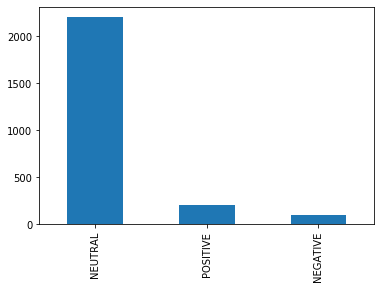

In [95]:
words_freq1['sentiment'].value_counts().plot(kind='bar')

In [96]:
words_freq1['sentiment'].value_counts()

NEUTRAL     2203
POSITIVE     204
NEGATIVE     100
Name: sentiment, dtype: int64

In [97]:
words_freq1.head(5)

,word,count,sentiment
0,loan,313,NEUTRAL
1,process,252,NEUTRAL
2,read,190,NEUTRAL
3,home,188,NEUTRAL
4,time,186,NEUTRAL


#### Most frequently used positive words

In [103]:
words_freq1[words_freq1['sentiment']=='POSITIVE'].sort_values(by=['count'],ascending=False).reset_index(drop=True)

,word,count,sentiment
0,great,139,POSITIVE
1,best,99,POSITIVE
2,professional,70,POSITIVE
3,easy,65,POSITIVE
4,highly,64,POSITIVE
5,thanks,61,POSITIVE
6,sure,51,POSITIVE
7,able,47,POSITIVE
8,good,39,POSITIVE
9,happy,37,POSITIVE


#### Most frequently used negative words

In [105]:
words_freq1[words_freq1['sentiment']=='NEGATIVE'].sort_values(by=['count'],ascending=False).reset_index(drop=True)

,word,count,sentiment
0,closed,68,NEGATIVE
1,extremely,46,NEGATIVE
2,hard,40,NEGATIVE
3,poor,32,NEGATIVE
4,complicated,18,NEGATIVE
5,little,15,NEGATIVE
6,past,13,NEGATIVE
7,previous,13,NEGATIVE
8,spent,11,NEGATIVE
9,late,11,NEGATIVE


### Lemmatize and stemming

In [267]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

In [268]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [269]:
data_processed=data['Reviews'].map(preprocess)

In [271]:
X_new1=data_processed

In [294]:
X_new1

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [great, wyndham, capital, person, professional, help, refinance, process, smoothly, thank]
1                                                                                                                                 

#### Bag of words

In [295]:
dictionary = gensim.corpora.Dictionary(X_new1)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 capital
1 great
2 help
3 person
4 process
5 professional
6 refinance
7 smoothly
8 thank
9 wyndham
10 correct


### Train Test split

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, random_state = 123)

In [279]:
print(f"*****************Train*****************")
print(f"Length of reviews : {len(X_train)} and length of ratings : {len(y_train)} ")
print(f"*****************Test*****************")
print(f"Length of reviews : {len(X_test)} and length of ratings : {len(y_test)} ")

*****************Train*****************
Length of reviews : 378 and length of ratings : 378 
*****************Test*****************
Length of reviews : 127 and length of ratings : 127 


### Building model using DTM

In [300]:
vect_dtm = CountVectorizer( stop_words='english', ngram_range=(1,1),min_df=1,max_df=0.95).fit(X_train)

In [231]:
X_train_fit = vect_dtm.fit(X_train)
X_train_dtm = vect_dtm.transform(X_train)
X_test_dtm = vect_dtm.transform(X_test)

In [215]:
# building naive bayes model on DTM
naive_model = MultinomialNB()
naive_model.fit(X_train_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [216]:
predict_train = naive_model.predict(X_train_dtm)
predict_test = naive_model.predict(X_test_dtm)

In [217]:
print('Accuracy on train: ',metrics.accuracy_score(y_train,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(y_test,predict_test))

Accuracy on train:  0.9894179894179894
Accuracy on test:  0.9763779527559056


In [218]:
# confusion matrix on test 
cm_test = metrics.confusion_matrix(y_test,predict_test,[5,1])

In [219]:
cm_test

array([[101,   1],
       [  2,  23]], dtype=int64)

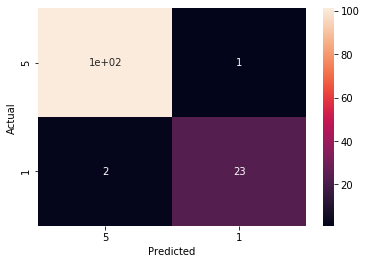

In [220]:
import seaborn as sns
sns.heatmap(cm_test,annot=True,xticklabels=[5,1],yticklabels=[5,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Topic modelling

In [221]:
vect_tdm = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,1),min_df=0.001,max_df=0.95)

In [223]:
X_train_tdm = vect_tdm.fit_transform(X_train)
X_test_tdm = vect.transform(X_test)

In [301]:
# train a LDA Model
lda_model = LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=50)
X_topics = lda_model.fit_transform(X_train_dtm)
topic_word = lda_model.components_ 
vocab = vect.get_feature_names()

In [322]:
np.array(vocab)

array(['10', '100', '101', ..., 'zach', 'zelada', 'zero'], dtype='<U18')

In [335]:
# view the topic models
top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)-1][:-(top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print(topic_words)

['developer' 'reliance' 'incorrect' 'tim' 'attitude' 'pay' 'rate' 'fedex'
 '2d' 'left']
['need' 'weeks' 'wait' 'week' 'donna' 'taken' 'lost' 'work' 'card' 'docs']
['joking' 'grateful' 'work' 'easily' 'holy' 'experiecne' 'offered'
 'service' 'speed' 'buyer']
['ll' 'ball' 'process' 'nasb' 'weeks' 'sent' 'dollars' 'closed'
 'developer' 'said']
['ll' 'time' 'read' 'process' 'morning' 'recommend' 'holy' 'grateful'
 'companies' 'rate']
['deal' 'hung' 'paranoid' 'uncertainties' 'receiving' 'consultation'
 'marcos' 'formally' 'crew' 'reached']
['trying' 'triumph' 'illiterate' 'dreading' 'communicates' 'careful'
 'regret' 'earned' 'anticipated' 'advocated']
['penny' 'works' 'inquires' 'purposes' 'encountered' 'referrals'
 'recommendation' 'pace' 'enjoyable' 'lived']
['teddy' 'moving' 'bar' 'germain' 'companies' 'joanne' 'patient'
 'represents' 'communications' 'hardwork']
['beneficial' 'bryan' 'experiecne' 'read' 'fantastic' 'koppel' 'items'
 'working' 'nasb' 'bar']
['process' 'll' 'helped' 'jo

### Building model using TDM

In [224]:
# building naive bayes model on DTM
naive_model = MultinomialNB()
naive_model.fit(X_train_tdm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [225]:
predict_train = naive_model.predict(X_train_tdm)
predict_test = naive_model.predict(X_test_tdm)

In [226]:
print('Accuracy on train: ',metrics.accuracy_score(y_train,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(y_test,predict_test))

Accuracy on train:  0.9285714285714286
Accuracy on test:  0.84251968503937


In [227]:
# confusion matrix on test 
cm_test = metrics.confusion_matrix(y_test,predict_test,[5,1])

In [228]:
cm_test

array([[101,   1],
       [ 19,   6]], dtype=int64)

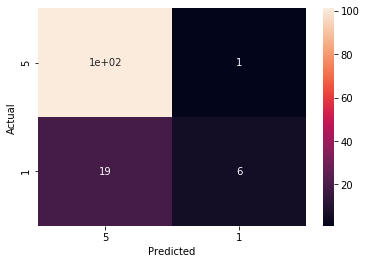

In [229]:
import seaborn as sns
sns.heatmap(cm_test,annot=True,xticklabels=[5,1],yticklabels=[5,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### This implies using DTM ,model is showing better accuracy